# 01 - SIMPLE LINEAR REGRESSION
-------------

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sbn 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("BankChurners.csv")
data.dropna(inplace = True)

In [3]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [4]:
data = data[["Total_Trans_Ct", "Total_Trans_Amt"]]

In [5]:
x = data[["Total_Trans_Ct"]]
y = data[["Total_Trans_Amt"]]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

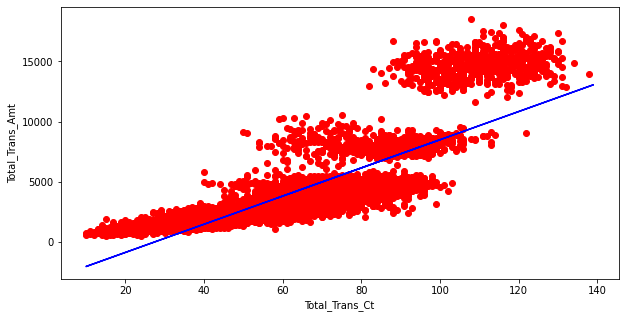

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_test, lr.predict(x_test), color = "blue")

plt.xlabel("Total_Trans_Ct")
plt.ylabel("Total_Trans_Amt")

plt.show()

In [12]:
print(lr.predict([[250]]))

[[26028.39528664]]


In [13]:
print("R2 Değeri:", r2_score(y_train, lr.predict(x_train)))

R2 Değeri: 0.6520414088737685


# 02 - MULTIPLE LINEAR REGRESSION
----------

In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [120]:
dataDf = pd.read_csv("BankChurners.csv")

In [121]:
dataDf.dropna(inplace=True)

In [122]:
dataDf

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [123]:
dataDf = dataDf[["Customer_Age", "Gender", "Marital_Status", "Avg_Open_To_Buy"]]

In [124]:
dataDf

Customer_Age Gender Marital_Status  Avg_Open_To_Buy
0                45      M        Married          11914.0
1                49      F         Single           7392.0
2                51      M        Married           3418.0
3                40      F        Unknown            796.0
4                40      M        Married           4716.0
...             ...    ...            ...              ...
10122            50      M         Single           2152.0
10123            41      M       Divorced           2091.0
10124            44      F        Married           5409.0
10125            30      M        Unknown           5281.0
10126            43      F        Married           8427.0

[10127 rows x 4 columns]

In [125]:
from sklearn import preprocessing

In [126]:
dataDf2 = dataDf.apply(preprocessing.LabelEncoder().fit_transform)

In [127]:
dataDf3 = dataDf2[["Marital_Status"]]

In [128]:
oneHotEncoder = preprocessing.OneHotEncoder()

In [129]:
dataDf3 = oneHotEncoder.fit_transform(dataDf3).toarray()

In [135]:
data1 = pd.DataFrame(data=dataDf3, index=range(10127), columns=["Married", "Single", "Unknown", "Divorced"])
data2 = pd.concat([data1, dataDf[["Customer_Age"]]], axis=1)
data3 = pd.concat([data2, dataDf2[["Gender"]]], axis=1)
data4 = pd.concat([data3, dataDf[["Avg_Open_To_Buy"]]], axis=1)

In [136]:
data4

Married  Single  Unknown  Divorced  Customer_Age  Gender  \
0          0.0     1.0      0.0       0.0            45       1   
1          0.0     0.0      1.0       0.0            49       0   
2          0.0     1.0      0.0       0.0            51       1   
3          0.0     0.0      0.0       1.0            40       0   
4          0.0     1.0      0.0       0.0            40       1   
...        ...     ...      ...       ...           ...     ...   
10122      0.0     0.0      1.0       0.0            50       1   
10123      1.0     0.0      0.0       0.0            41       1   
10124      0.0     1.0      0.0       0.0            44       0   
10125      0.0     0.0      0.0       1.0            30       1   
10126      0.0     1.0      0.0       0.0            43       0   

       Avg_Open_To_Buy  
0              11914.0  
1               7392.0  
2               3418.0  
3                796.0  
4               4716.0  
...                ...  
10122           2152.0  
10123           2091.0  
10124           5409.0  
10125           5281.0  
10126           8427.0  

[10127 rows x 7 columns]

In [137]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(data4.iloc[:, :-1], data4.iloc[:, -1], test_size = 1/3, random_state = 0)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lr = LinearRegression()

In [143]:
lr.fit(x_train, y_train)

LinearRegression()

In [160]:
predict = lr.predict(x_test)

In [161]:
print(predict)

[12488.   4196.5  4060.  ...  4893.   3385.5 10805. ]


In [162]:
print("R2 Değeri: ", r2_score(y_train, lr.predict(x_train)))

R2 Değeri:  0.1838302528958582


<AxesSubplot:>

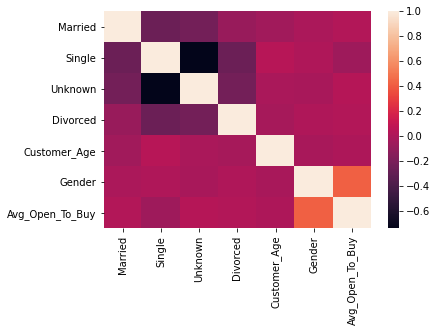

In [149]:
sbn.heatmap(data4.corr())

In [150]:
import statsmodels.api as sm 

In [156]:
x1 = np.append(arr=np.ones((10127, 0)).astype(int), values=data4.iloc[:, 0:-1], axis=1)
x2 = data4.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values
x3 = np.array(x2, dtype = float)

model = sm.OLS(data4.iloc[:, -1:], x3).fit()

In [159]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Open_To_Buy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.286e+32
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:05:31   Log-Likelihood:             2.3885e+05
No. Observations:               10127   AIC:                        -4.777e+05
Df Residuals:                   10120   BIC:                        -4.776e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.308e-13   9.39e-13     -0.991      0.3

# 03 - POLY PEGRESSION
------------

In [174]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [175]:
dataFrame = pd.read_csv("BankChurners.csv")
dataFrame.dropna(inplace = True)

In [176]:
dataFrame

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [183]:
x = dataFrame[["Total_Trans_Ct"]]
y = dataFrame[["Total_Trans_Amt"]]

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [187]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

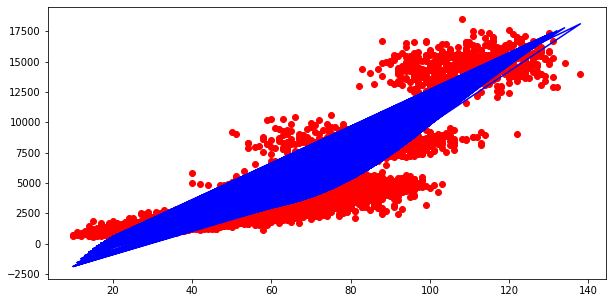

In [188]:
plt.figure(figsize= (10, 5))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lin_reg.predict(poly_reg.fit_transform(x_train)), color = "blue")
plt.show()

In [191]:
print(lin_reg.predict(poly_reg.fit_transform([[100]])))

[[9794.94460902]]


In [193]:
print('Polynomial R2 degeri')
print(r2_score(y_train, lin_reg.predict(poly_reg.fit_transform(x_train))))

Polynomial R2 degeri
0.7886638594996455


# 04 - SVM REGRESSION
------------

In [194]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [195]:
dataPd = pd.read_csv("BankChurners.csv")

In [196]:
dataPd.dropna(inplace=True)

In [197]:
dataPd

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [226]:
x = dataFrame[["Total_Trans_Ct"]].sort_index()
y = dataFrame[["Total_Trans_Amt"]].sort_index()

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [229]:
from sklearn.preprocessing import StandardScaler

In [230]:
scaler1 = StandardScaler()

In [231]:
x_olcekli = scaler1.fit_transform(x_train)

In [232]:
scaler2 = StandardScaler()

In [233]:
y_olcekli = scaler2.fit_transform(y_train)

In [234]:
from sklearn.svm import SVR

In [235]:
svr_reg = SVR(kernel="rbf", gamma="scale")

In [236]:
svr_reg.fit(x_olcekli, y_olcekli)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

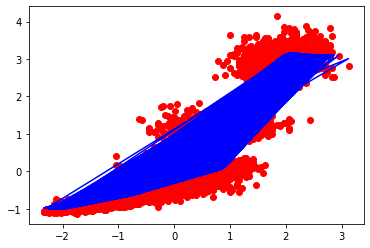

In [237]:
plt.scatter(x_olcekli, y_olcekli, color = "red")
plt.plot(x_olcekli, svr_reg.predict(x_olcekli), color = "blue")
plt.show()

In [238]:
print(svr_reg.predict([[1]]))

[0.24660199]


In [240]:
print("R2 Değeri: ", r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

R2 Değeri:  0.8239383067786136


# 05 - DECISION TREE
----------

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [245]:
frame = pd.read_csv("BankChurners.csv")

In [246]:
frame.dropna(inplace=True)

In [247]:
frame

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [248]:
x = dataFrame[["Total_Trans_Ct"]].sort_index()
y = dataFrame[["Total_Trans_Amt"]].sort_index()

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [251]:
from sklearn.tree import DecisionTreeRegressor

In [252]:
dt_reg = DecisionTreeRegressor(random_state=1)

In [253]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

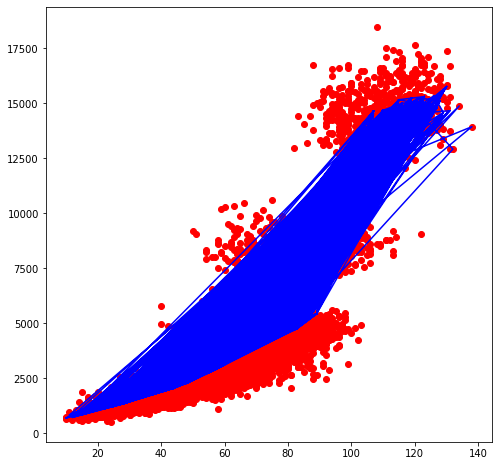

In [254]:
plt.figure(figsize= (8, 8))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, dt_reg.predict(x_train), color = "blue")
plt.show()

In [255]:
print(dt_reg.predict([[100]]))

[11649.89285714]


In [256]:
print("R2 Değeri: ", r2_score(y_train, dt_reg.predict(x_train)))

R2 Değeri:  0.8349154789905237


# 06 - RANDOM FOREST
-------------

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [258]:
DataFrame = pd.read_csv("BankChurners.csv")

In [259]:
DataFrame.dropna(inplace = True)

In [260]:
DataFrame

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [261]:
x = dataFrame[["Total_Trans_Ct"]].sort_index()
y = dataFrame[["Total_Trans_Amt"]].sort_index()

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [264]:
from sklearn.ensemble import RandomForestRegressor

In [265]:
rft_reg = RandomForestRegressor()

In [266]:
rft_reg.fit(x_train, y_train)

<ipython-input-266-b973fa220fce>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft_reg.fit(x_train, y_train)


RandomForestRegressor()

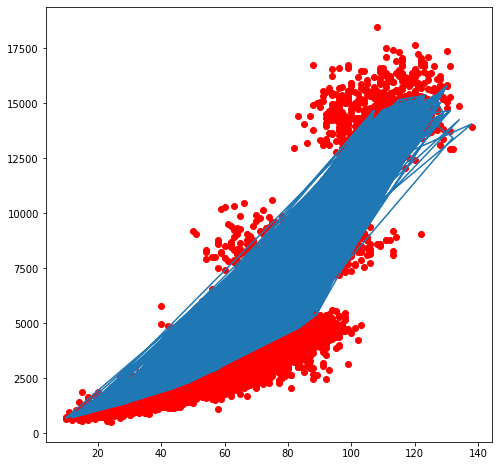

In [267]:
plt.figure(figsize= (8, 8))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, rft_reg.predict(x_train))
plt.show()

In [268]:
print(rft_reg.predict([[100]]))

[11660.48671067]


In [269]:
print("R2 Değeri: ", r2_score(y_train, rft_reg.predict(x_train)))

R2 Değeri:  0.8348659559117884
